In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Investigating the Titanic Dataset

## Question Brainstorm

* What factors made people more likely to survive?
* Do the genders of different socio-economic classes vary? For example, are there more men in first class than women?
* Is the age of a higher socio-economic class less likely to be estimated?
* Are certain decks more likely to survive?
* Was it more expensive to get on at different ports?

In [13]:
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
def get_deck(cabin):
    if pd.isnull(cabin):
        return np.NaN
    return cabin[:1]

In [15]:
titanic_data['Deck'] = titanic_data['Cabin'].apply(get_deck)

In [18]:
titanic_data['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [20]:
titanic_data[titanic_data['Deck'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [57]:
deck_survived = titanic_data.groupby('Deck')['Survived'].sum()

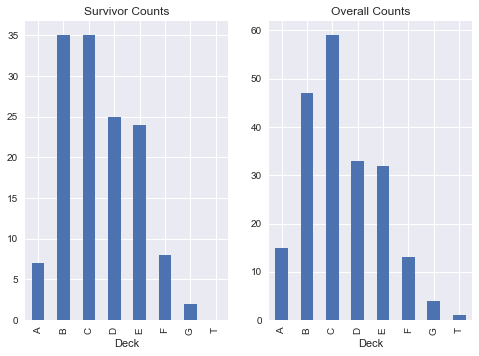

In [105]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
deck_survived.plot(kind='bar', title='Survivor Counts', ax=axs[0]);
deck_counts.plot(kind='bar', title='Overall Counts', ax=axs[1]);

In [69]:
deck_counts = titanic_data.groupby('Deck')['PassengerId'].count()

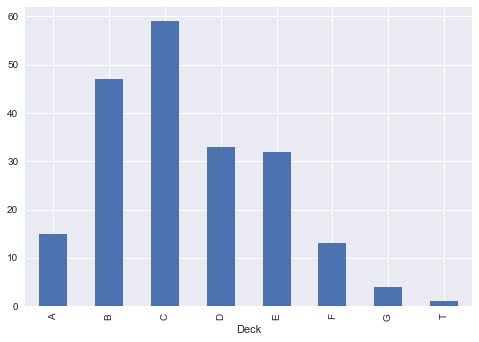

In [103]:
deck_counts.plot(kind='bar');